In [230]:
import matplotlib.pyplot as plt
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [368]:
df2 = pd.DataFrame(np.array( [[2002, 65, 48549, 1], [2003, 81, 49690, 1], [2004, 84, 50769, 1], [2005, 97, 51581,1], [2006, 105, 52100,1], [2007, 104, 50206, 0], [2008, 67, 49864.85, 0], [2009, 80, 47001, 1]] ),
                       columns=['Year', 'Number of Murders per 1000', 'GDP per capita', 'churn'])

df2 = pd.DataFrame(np.array( [[2002, 65, 48549, 1], [2003, 81, 49690, 1], [2004, 84, 50769, 1], [2005, 97, 51581,1], [2006, 105, 52100,1], [2007, 104, 50206, 1], [2008, 67, 49864.85, 0], [2009, 80, 47001, 0]] ),
                       columns=['Year', 'Number of Murders per 1000', 'GDP per capita', 'churn'])

df2

,Year,Number of Murders per 1000,GDP per capita,churn
0,2002.0,65.0,48549.00,1.0
1,2003.0,81.0,49690.00,1.0
2,2004.0,84.0,50769.00,1.0
3,2005.0,97.0,51581.00,1.0
4,2006.0,105.0,52100.00,1.0
5,2007.0,104.0,50206.00,1.0
6,2008.0,67.0,49864.85,0.0
7,2009.0,80.0,47001.00,0.0


In [369]:

X = np.asarray(df2[['Number of Murders per 1000', 'GDP per capita']])
X[0:5]





array([[   65., 48549.],
       [   81., 49690.],
       [   84., 50769.],
       [   97., 51581.],
       [  105., 52100.]])

In [370]:
y = np.asarray(df2['churn'])
y [0:10]

array([1., 1., 1., 1., 1., 1., 0., 0.])

In [371]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.41, -0.93],
       [-0.3 , -0.18],
       [-0.1 ,  0.52],
       [ 0.8 ,  1.05],
       [ 1.36,  1.39]])

In [372]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.41, -0.93],
       [-0.3 , -0.18],
       [-0.1 ,  0.52],
       [ 0.8 ,  1.05],
       [ 1.36,  1.39]])

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.7, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2, 2) (2,)
Test set: (6, 2) (6,)


In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [375]:
yhat = LR.predict(X_test)
yhat

array([1., 0., 1., 0., 0., 1.])

In [376]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [377]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6666666666666666

In [378]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[3 2]
 [0 1]]


Confusion matrix, without normalization
[[3 2]
 [0 1]]


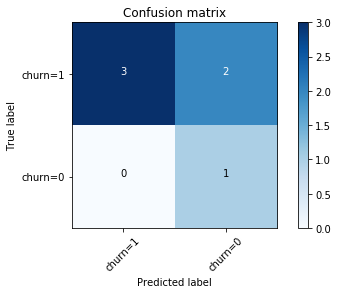

In [379]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [380]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       1.00      0.60      0.75         5

   micro avg       0.67      0.67      0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



In [381]:
## okay now le'ts add the newer data that I researched, to see if I can predict

In [382]:
my_data = pd.read_csv("NewarkData.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,year,murders,gdp,median home,unemployment,murderup
0,1,2002,65,48549.0,405000,6.7,1
1,2,2003,81,49690.0,420000,7.1,1
2,3,2004,84,50769.0,505000,6.8,1
3,4,2005,97,51581.0,640000,4.5,1
4,5,2006,105,52100.0,660000,5.2,1


In [383]:
X = np.asarray(my_data[['murders', 'gdp', 'median home', 'unemployment']])
X[0:10]

print (X[0])

[6.50e+01 4.85e+04 4.05e+05 6.70e+00]


In [384]:
my_data.columns

Index(['Unnamed: 0', 'year', 'murders', 'gdp', 'median home', 'unemployment',
       'murderup'],
      dtype='object')

In [385]:
y = np.asarray(my_data['murderup'])
y [0:10]

array([1, 1, 1, 1, 1, 0, 0, 1])

In [386]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.41, -0.93, -0.96,  0.58],
       [-0.3 , -0.18, -0.84,  0.89],
       [-0.1 ,  0.52, -0.13,  0.66],
       [ 0.8 ,  1.05,  1.  , -1.14],
       [ 1.36,  1.39,  1.17, -0.6 ]])

In [422]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.7, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2, 4) (2,)
Test set: (6, 4) (6,)


In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [424]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 0, 1, 1])

In [425]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [426]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5

Confusion matrix, without normalization
[[3 2]
 [1 0]]


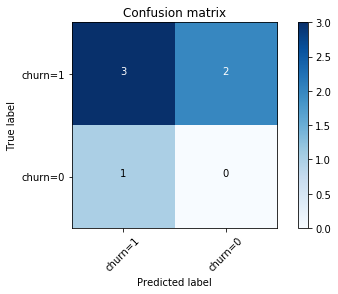

In [427]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [428]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.60      0.67         5

   micro avg       0.50      0.50      0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6

